# **Линейная регрессия (часть 3)**

Котпев Данил

**Подключим библиотеки**

In [461]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder

# Задание 6

1) Импортируем  данные  набора House   Prices   Competition в DataFrame и  выведим несколько первых записей

In [462]:
dataAll = pd.read_csv("house_prices.csv")
dataAll.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2) Оставим в наборе для дальнейшей обработки только те количественные и качественные признаки, которые были отобраны по результатам предварительного анализа

In [463]:
dataNum = ["1stFlrSF", "OverallQual", "GrLivArea", "GarageArea", "YearBuilt", "FullBath"]
dataCat = ["GarageFinish",  "Neighborhood", "KitchenQual", "GarageType", "ExterQual"] 
data = dataAll[dataNum + dataCat]
data.head()

,1stFlrSF,OverallQual,GrLivArea,GarageArea,YearBuilt,FullBath,GarageFinish,Neighborhood,KitchenQual,GarageType,ExterQual
0,856,7,1710,548,2003,2,RFn,CollgCr,Gd,Attchd,Gd
1,1262,6,1262,460,1976,2,RFn,Veenker,TA,Attchd,TA
2,920,7,1786,608,2001,2,RFn,CollgCr,Gd,Attchd,Gd
3,961,7,1717,642,1915,1,Unf,Crawfor,Gd,Detchd,TA
4,1145,8,2198,836,2000,2,RFn,NoRidge,Gd,Attchd,Gd


3) Выделим значения прогнозируемого признака SalePrice в отдельный объект. Удалим соответствующий столбец из набора данных

In [464]:
salePrice = dataAll["SalePrice"]
salePrice.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

4. Разделим полученный набор на обучающую и тестовую выборки.

In [465]:
x_train, x_test, y_train, y_test = train_test_split(dataAll, 
                                                    salePrice, 
                                                    test_size = 0.3, 
                                                    train_size = 0.7, 
                                                    random_state = 42)

5) Использум программный код, написанный при выполнении задания по предварительной обработке данных этого набора, реализуем Pipeline, включающий все действия по подготовке данных (логарифмирование и масштабирование количественных признаков, бинарное  кодирование  категориальных  признаков),  а также  построение  модели линейной регрессии

In [466]:
preprocessor = ColumnTransformer(
    transformers=[
        ('quant', Pipeline(steps=[('log', FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=False)), 
                                  ('scaler', StandardScaler())]), dataNum),
        ('qual', OneHotEncoder(handle_unknown='ignore'), dataCat)])

coef = 0.01

pipeOrigin = Pipeline([("preprocessing", preprocessor), ("lr", LinearRegression() )])
pipeRidge = Pipeline([("preprocessing", preprocessor), ("ridge", Ridge(coef))])
pipeLasso = Pipeline([("preprocessing", preprocessor), ("lasso", Lasso(coef))])

6) Обучим созданный обработчик на обучающей выборке

In [467]:
pipeOrigin.fit(x_train, y_train)
pipeRidge.fit(x_train, y_train)
pipeLasso.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('quant',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       inverse_func=<ufunc 'expm1'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['1stFlrSF', 'OverallQual',
                                                   'GrLivArea', 'GarageArea',
                                                   'YearBuilt', 'FullBath']),
                                                 ('qual',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['GarageFinish',
                                                   'Neighborhood',
                                                   'KitchenQual', 'GarageType',
                                                   'ExterQual'])])),
                ('lasso', Lasso(alpha=0.01))])

7) Оценим качество полученной модели на тестовых данных с помощью метрики MAE

In [468]:
predOrigin= pipeOrigin.predict(x_test)
predRidge = pipeRidge.predict(x_test)
predLasso = pipeLasso.predict(x_test)

print(f"MAE: {mean_absolute_error(y_test, predOrigin)}")
print(f"MAE (L2 регуляризатором {coef}): {mean_absolute_error(y_test, predRidge)}")
print(f"MAE (L1 регуляризатором {coef}): {mean_absolute_error(y_test, predLasso)}")

MAE: 21732.138207817654
MAE (L2 регуляризатором 0.01): 21732.62989551449
MAE (L1 регуляризатором 0.01): 21732.126057328867


8) Для  получения  наглядного  представления  об  адекватности  модели  выполнить визуализацию:  выведим  облако  точек  в  координатах  «истинные  значения  целевой функции» –«предсказанные моделью значения». Построим такие графики отдельно для обучающей и тестовой выборки. Проанализируем полученные результаты, сделать выводы.

Text(0.5, 1.0, 'Тестовая выборка')

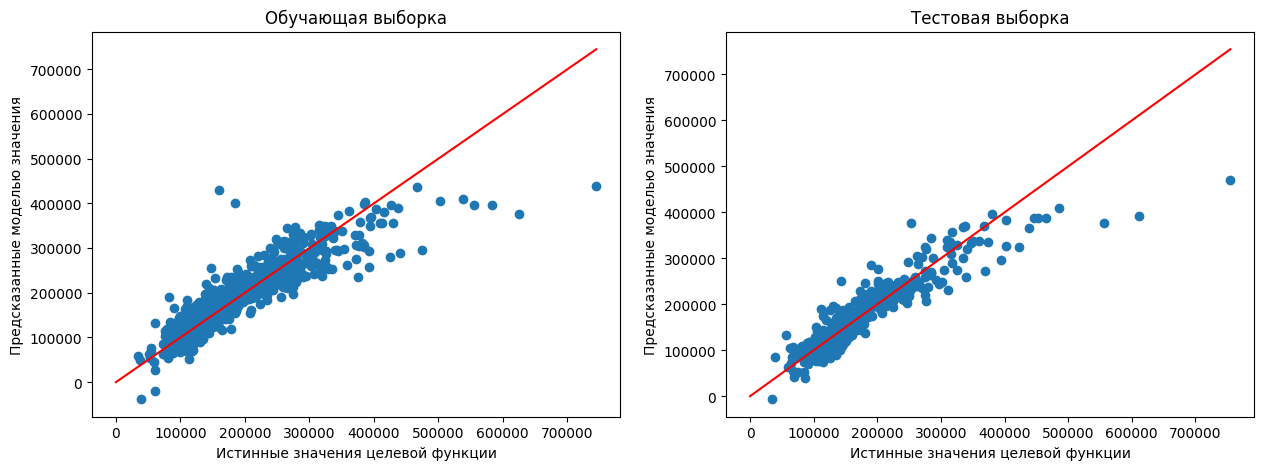

In [469]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(y_train, pipeOrigin.predict(x_train))
plt.plot([0, max(y_train)], [0, max(y_train)], color = 'red')
plt.xlabel('Истинные значения целевой функции')
plt.ylabel('Предсказанные моделью значения')
plt.title('Обучающая выборка')


plt.subplot(1,2,2)
plt.scatter(y_test, predOrigin)
plt.plot([0, max(y_test)], [0, max(y_test)], color = 'red')
plt.xlabel('Истинные значения целевой функции')
plt.ylabel('Предсказанные моделью значения')
plt.title('Тестовая выборка')


**Вывод**: как видно на графики предсказательная модель работает досточно хорошо, но имеется некое несоотсвествие, скорее связанное с некачесветнным данными, имеющиеся у них выбросы и ананомалии, следовательно модель требует доработок

9) Поэкспериментируем  с  настройками  модели  линейной  регрессии  (использование регуляризаторов, изменение скорости обучения, условий останова и т. п.); 

Постараем добиться как можно меньшего значения ошибки. Лучшую из полученных моделей –сохранить  (для  сравнения  с  другими  моделями,  которые  будут  построены  в дальнейшем).

In [470]:
import warnings
warnings.filterwarnings('ignore')

print("MAE: 21732.138207817654")

coefs = [0.01, 0.1, 0.5, 1]

for coef in coefs:
  pipeRidge = Pipeline([("preprocessing", preprocessor), ("ridge", Ridge(coef))])
  pipeLasso = Pipeline([("preprocessing", preprocessor), ("lasso", Lasso(coef))])
  pipeRidge.fit(x_train, y_train)
  pipeLasso.fit(x_train, y_train)
  predRidge = pipeRidge.predict(x_test)
  predLasso = pipeLasso.predict(x_test)
  print(f"\nMAE (L1 регуляризатором {coef}): {mean_absolute_error(y_test, predLasso)}")
  print(f"MAE (L2 регуляризатором {coef}): {mean_absolute_error(y_test, predRidge)}")

MAE: 21732.138207817654

MAE (L1 регуляризатором 0.01): 21732.126057328867
MAE (L2 регуляризатором 0.01): 21732.62989551449

MAE (L1 регуляризатором 0.1): 21731.48442621234
MAE (L2 регуляризатором 0.1): 21705.088503128427

MAE (L1 регуляризатором 0.5): 21727.90640650903
MAE (L2 регуляризатором 0.5): 21637.68047236869

MAE (L1 регуляризатором 1): 21723.38440636757
MAE (L2 регуляризатором 1): 21604.258826764028


Лучшей моделью L1 является с коэфицентом регуляризатора 1 с МАЕ равной 21723.38440636757

Лучшей моделью L2 является с коэфицентом регуляризатора 1 с МАЕ равной 21604.258826764028